In [ ]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from imblearn.over_sampling import RandomOverSampler
import nltk
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
df=pd.read_csv("/kaggle/input/cleanda/cleanedDataset.csv")

In [ ]:
df

,Thought,Label,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count,length_of_Thought
0,everyon probabl mad,0,3,3,0,0,6.333333,21,0,0,0,21
1,braver believ,1,2,2,0,0,6.500000,14,0,0,0,14
2,open eye want see,1,4,4,0,0,3.750000,18,0,0,0,18
3,clearli dont want friend anymor,0,5,5,0,0,5.800000,33,0,0,0,33
4,never done befor,0,3,3,1,0,5.000000,17,0,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...
156780,believ fast time fli,0,4,4,0,0,5.000000,23,0,0,0,23
156781,eat spici food,0,3,3,0,0,4.000000,14,0,0,0,14
156782,itâ OK screw Up nigel raw,1,6,6,1,0,3.500000,26,0,0,0,26
156783,itâ here itâ beauti itâ sign fit right in,1,9,7,2,0,4.666667,50,0,0,0,50


In [ ]:
df.groupby("Label").describe()

word_count                                                \
              count      mean       std  min  25%  50%  75%   max   
Label                                                               
negative    71108.0  6.807673  4.505589  0.0  4.0  6.0  8.0  86.0   
positive    85677.0  7.155771  4.799395  0.0  4.0  6.0  9.0  92.0   

         unique_word_count            ... mention_count       \
                     count      mean  ...           75%  max   
Label                                 ...                      
negative           71108.0  6.708022  ...           0.0  0.0   
positive           85677.0  7.022013  ...           0.0  0.0   

         length_of_Thought                                                      
                     count       mean        std  min   25%   50%   75%    max  
Label                                                                           
negative           71108.0  48.128073  33.472786  0.0  25.0  43.0  63.0  591.0  
positive           85677.0  49.909684  34.275052  0.0  27.0  45.0  64.0  675.0  

[2 rows x 80 columns]

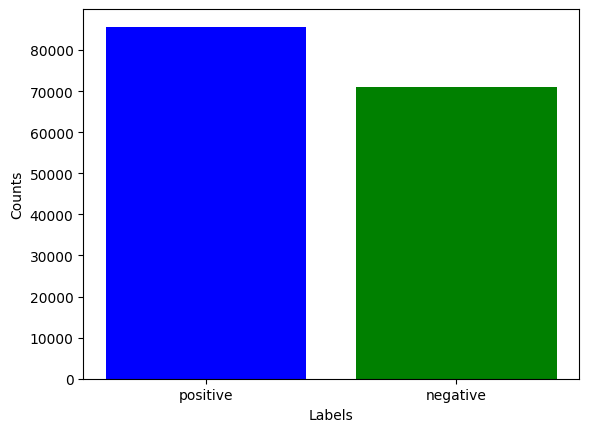

In [ ]:
label_counts = df['Label'].value_counts()

# plt.figure(figsize=(6, ))
plt.bar(label_counts.index, label_counts.values, color=['blue', 'green'])
plt.xlabel('Labels')
plt.ylabel('Counts')
# plt.title('Distribution of Labels')
plt.show()

## Preprocess raw text for Sentiment analysis

**Preprocess raw text for Sentiment analysis**

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

Tokenizing the string

Lowercasing

Removing stop words and punctuation

Stemming

In [ ]:
df_resampled = df.copy()

In [ ]:
df_resampled['Thought'] = df_resampled['Thought'].astype(str)

### Tokenize the string

In [ ]:
df_resampled['Thought'] = df_resampled['Thought'].apply(lambda x: word_tokenize(x))

In [ ]:
print(df_resampled)

                                                  Thought     Label  \
0                                 [everyon, probabl, mad]  negative   
1                                        [braver, believ]  positive   
2                                  [open, eye, want, see]  positive   
3                   [clearli, dont, want, friend, anymor]  negative   
4                                    [never, done, befor]  negative   
...                                                   ...       ...   
156780                          [believ, fast, time, fli]  negative   
156781                                 [eat, spici, food]  negative   
156782                   [itâ, OK, screw, Up, nigel, raw]  positive   
156783  [itâ, here, itâ, beauti, itâ, sign, fit, right...  positive   
156784                   [stuck, â, cover, alicia, widar]  negative   

        word_count  unique_word_count  stop_word_count  url_count  \
0                3                  3                0          0   
1        

### Remove stop words

In [ ]:
def remove_stop_words(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join(word for word in words if word.lower() not in stop_words)
    return text
df_resampled['Thought'] = df_resampled['Thought'].apply(remove_stop_words)
print(df_resampled)

                                                  Thought     Label  \
0                                 [everyon, probabl, mad]  negative   
1                                        [braver, believ]  positive   
2                                  [open, eye, want, see]  positive   
3                   [clearli, dont, want, friend, anymor]  negative   
4                                    [never, done, befor]  negative   
...                                                   ...       ...   
156780                          [believ, fast, time, fli]  negative   
156781                                 [eat, spici, food]  negative   
156782                   [itâ, OK, screw, Up, nigel, raw]  positive   
156783  [itâ, here, itâ, beauti, itâ, sign, fit, right...  positive   
156784                   [stuck, â, cover, alicia, widar]  negative   

        word_count  unique_word_count  stop_word_count  url_count  \
0                3                  3                0          0   
1        

### Stemming

In [ ]:
stemmer = PorterStemmer()
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]
df_resampled['Thought'] = df_resampled['Thought'].apply(stem_tokens)
print(df_resampled)

                                                  Thought     Label  \
0                                 [everyon, probabl, mad]  negative   
1                                        [braver, believ]  positive   
2                                  [open, eye, want, see]  positive   
3                   [clearli, dont, want, friend, anymor]  negative   
4                                    [never, done, befor]  negative   
...                                                   ...       ...   
156780                          [believ, fast, time, fli]  negative   
156781                                 [eat, spici, food]  negative   
156782                   [itâ, OK, screw, Up, nigel, raw]  positive   
156783  [itâ, here, itâ, beauti, itâ, sign, fit, right...  positive   
156784                   [stuck, â, cover, alicia, widar]  negative   

        word_count  unique_word_count  stop_word_count  url_count  \
0                3                  3                0          0   
1        

In [ ]:
label_mapping = {'positive': 1, 'negative': 0}
df['Label'] = df['Label'].map(label_mapping)
print(df)

                                          Thought  Label  word_count  \
0                             everyon probabl mad      0           3   
1                                   braver believ      1           2   
2                               open eye want see      1           4   
3                 clearli dont want friend anymor      0           5   
4                                never done befor      0           3   
...                                           ...    ...         ...   
156780                       believ fast time fli      0           4   
156781                             eat spici food      0           3   
156782                  itâ OK screw Up nigel raw      1           6   
156783  itâ here itâ beauti itâ sign fit right in      1           9   
156784                 stuck â cover alicia widar      0           5   

        unique_word_count  stop_word_count  url_count  mean_word_length  \
0                       3                0          0       

In [ ]:
label_mapping = {'positive': 1, 'negative': 0}
df_resampled['Label'] = df_resampled['Label'].map(label_mapping)
print(df_resampled)

                                                  Thought  Label  word_count  \
0                                 [everyon, probabl, mad]      0           3   
1                                        [braver, believ]      1           2   
2                                  [open, eye, want, see]      1           4   
3                   [clearli, dont, want, friend, anymor]      0           5   
4                                    [never, done, befor]      0           3   
...                                                   ...    ...         ...   
156780                          [believ, fast, time, fli]      0           4   
156781                                 [eat, spici, food]      0           3   
156782                   [itâ, OK, screw, Up, nigel, raw]      1           6   
156783  [itâ, here, itâ, beauti, itâ, sign, fit, right...      1           9   
156784                   [stuck, â, cover, alicia, widar]      0           5   

        unique_word_count  stop_word_co

## Model Building

### CountVectorizer

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x = np.array(df_resampled['Thought'])
y = np.array(df_resampled["Label"])

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(df_resampled['Thought'].apply(lambda x: ' '.join(x)))
y = df_resampled["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     14222
           1       0.93      0.95      0.94     17135

    accuracy                           0.93     31357
   macro avg       0.93      0.93      0.93     31357
weighted avg       0.93      0.93      0.93     31357



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


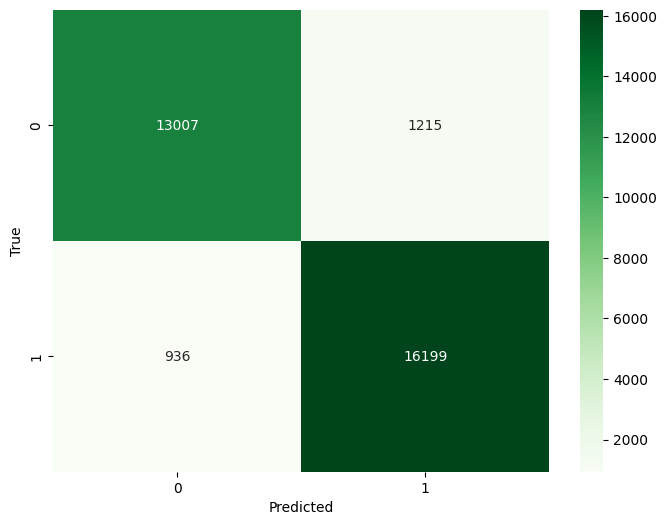

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = sorted(set(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.title('Confusion Matrix')
plt.show()

### Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     14222
           1       0.91      0.90      0.90     17135

    accuracy                           0.90     31357
   macro avg       0.90      0.90      0.90     31357
weighted avg       0.90      0.90      0.90     31357



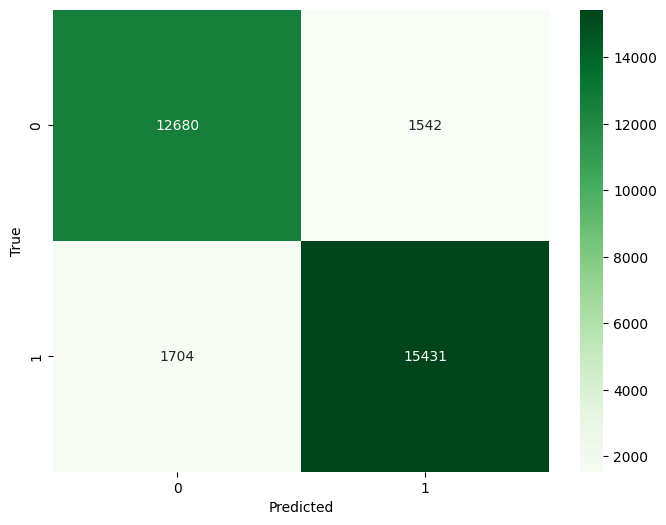

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_labels = sorted(set(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.title('Confusion Matrix')
plt.show()

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

# Calculate the accuracy of the model
accuracy5 = accuracy_score(y_test, y_pred)

# Calculate the recall, precision, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.41      0.56     14222
           1       0.66      0.95      0.78     17135

    accuracy                           0.71     31357
   macro avg       0.77      0.68      0.67     31357
weighted avg       0.76      0.71      0.68     31357



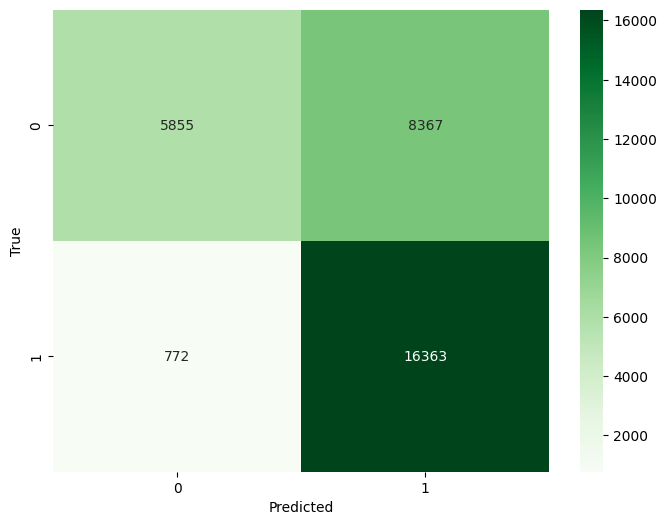

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_labels = sorted(set(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.title('Confusion Matrix')
plt.show()

### RNN

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 107s 30ms/step - accuracy: 0.8538 - loss: 0.3268 - val_accuracy: 0.9379 - val_loss: 0.1714
Epoch 2/10
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 106s 30ms/step - accuracy: 0.9547 - loss: 0.1281 - val_accuracy: 0.9435 - val_loss: 0.1612
Epoch 3/10
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 106s 30ms/step - accuracy: 0.9712 - loss: 0.0824 - val_accuracy: 0.9431 - val_loss: 0.1666
Epoch 4/10
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 106s 30ms/step - accuracy: 0.9795 - loss: 0.0574 - val_accuracy: 0.9438 - val_loss: 0.1849
Epoch 5/10
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 106s 30ms/step - accuracy: 0.9853 - loss: 0.0401 - val_accuracy: 0.9428 - val_loss: 0.2179
Epoch 6/10
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 142s 30ms/step - accuracy: 0.9896 - loss: 0.0293 - val_accuracy: 0.9440 - val_loss: 0.2312
Epoch 7/10
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 106s 30ms/step - accuracy: 0.9926 - loss: 0.0210 - val_accuracy: 0.9431 - val_loss: 0.2590
Epoch 8/10
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 107s 30ms/step - accuracy: 

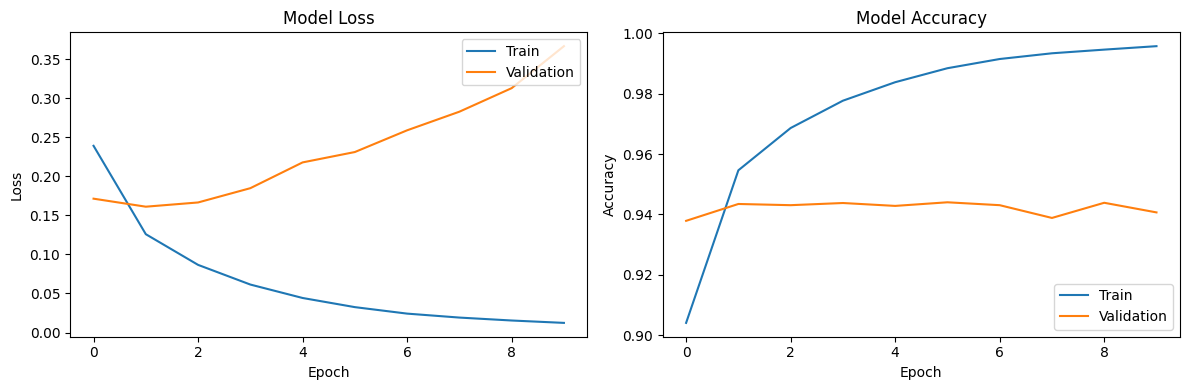

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load your dataset into df
# ...
df['Thought'] = df['Thought'].astype(str)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Thought'])
sequences = tokenizer.texts_to_sequences(df['Thought'])
max_sequence_length = 500
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['Label'], test_size=0.2, random_state=42)

num_classes = len(set(df['Label']))

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(units=100))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=-1)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

### CNN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


df['Thought'] = df['Thought'].astype(str)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Thought'])
sequences = tokenizer.texts_to_sequences(df['Thought'])
max_sequence_length = 400
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['Label'], test_size=0.2, random_state=42)

num_classes = 3

# Create the CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_split=0.2)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
  31/3136 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.5472 - loss: 0.8979 

I0000 00:00:1723106342.903641     165 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3136/3136 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.8496 - loss: 0.3261 - val_accuracy: 0.9398 - val_loss: 0.1661
Epoch 2/10
3136/3136 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9644 - loss: 0.1035 - val_accuracy: 0.9433 - val_loss: 0.1571
Epoch 3/10
3136/3136 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9833 - loss: 0.0503 - val_accuracy: 0.9363 - val_loss: 0.1886
Epoch 4/10
3136/3136 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9903 - loss: 0.0298 - val_accuracy: 0.9379 - val_loss: 0.2426
Epoch 5/10
3136/3136 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9939 - loss: 0.0184 - val_accuracy: 0.9353 - val_loss: 0.2726
Epoch 6/10
3136/3136 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9955 - loss: 0.0143 - val_accuracy: 0.9384 - val_loss: 0.3176
Epoch 7/10
3136/3136 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9961 - loss: 0.0117 - val_accuracy: 0.9372 - val_loss: 0.3396
Epoch 8/10
3136/3136 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9970 - loss: 0.0092 - val

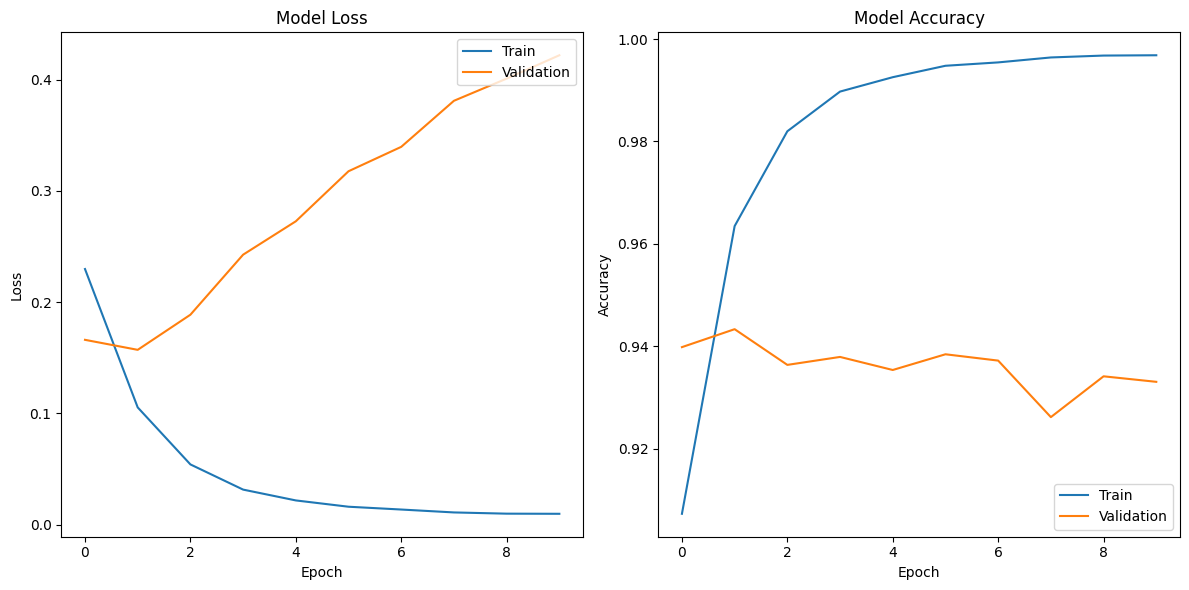

980/980 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.9330293076506043
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     14222
           1       0.93      0.94      0.94     17135

    accuracy                           0.93     31357
   macro avg       0.93      0.93      0.93     31357
weighted avg       0.93      0.93      0.93     31357



In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=-1)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

###LSTM

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
3136/3136 ━━━━━━━━━━━━━━━━━━━━ 103s 32ms/step - accuracy: 0.8312 - loss: 0.3521 - val_accuracy: 0.9325 - val_loss: 0.1816
Epoch 2/10
3136/3136 ━━━━━━━━━━━━━━━━━━━━ 100s 32ms/step - accuracy: 0.9531 - loss: 0.1316 - val_accuracy: 0.9369 - val_loss: 0.1717
Epoch 3/10
3136/3136 ━━━━━━━━━━━━━━━━━━━━ 101s 32ms/step - accuracy: 0.9682 - loss: 0.0887 - val_accuracy: 0.9389 - val_loss: 0.1805
Epoch 4/10
3136/3136 ━━━━━━━━━━━━━━━━━━━━ 101s 32ms/step - accuracy: 0.9772 - loss: 0.0635 - val_accuracy: 0.9389 - val_loss: 0.1874
Epoch 5/10
3136/3136 ━━━━━━━━━━━━━━━━━━━━ 101s 32ms/step - accuracy: 0.9842 - loss: 0.0434 - val_accuracy: 0.9376 - val_loss: 0.2293
Epoch 6/10
3136/3136 ━━━━━━━━━━━━━━━━━━━━ 101s 32ms/step - accuracy: 0.9882 - loss: 0.0323 - val_accuracy: 0.9398 - val_loss: 0.2537
Epoch 7/10
3136/3136 ━━━━━━━━━━━━━━━━━━━━ 101s 32ms/step - accuracy: 0.9918 - loss: 0.0240 - val_accuracy: 0.9372 - val_loss: 0.2986
Epoch 8/10
3136/3136 ━━━━━━━━━━━━━━━━━━━━ 102s 32ms/step - accuracy: 

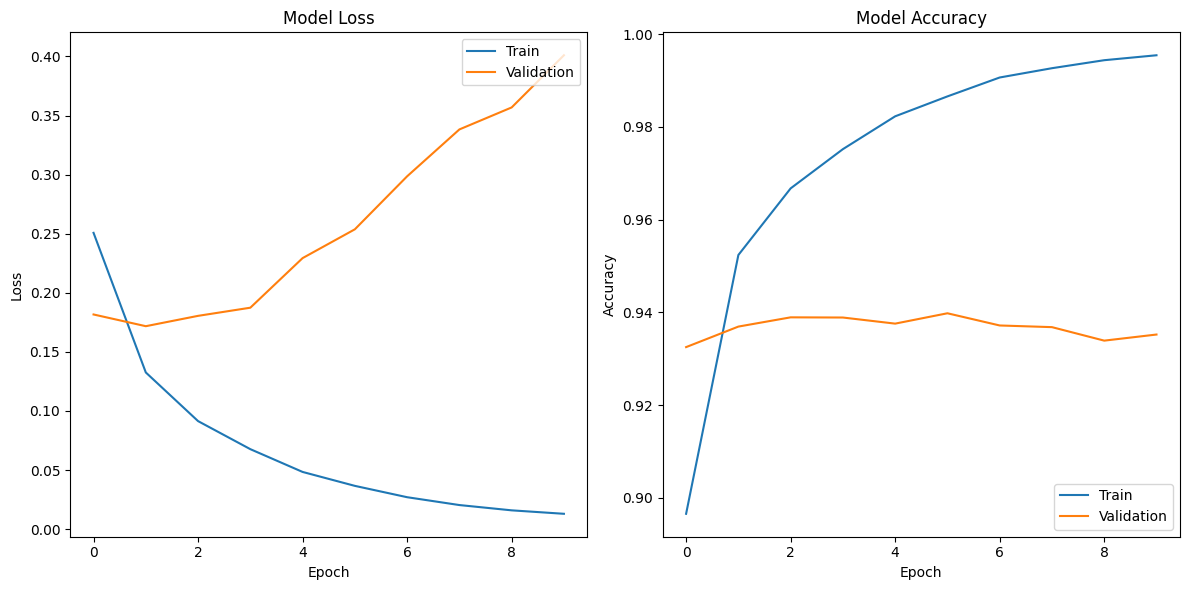

980/980 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step
Accuracy: 0.9339541410211436
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     14222
           1       0.94      0.94      0.94     17135

    accuracy                           0.93     31357
   macro avg       0.93      0.93      0.93     31357
weighted avg       0.93      0.93      0.93     31357



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

df['Thought'] = df['Thought'].astype(str)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Thought'])
sequences = tokenizer.texts_to_sequences(df['Thought'])

max_sequence_length = 500
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['Label'], test_size=0.2, random_state=42)

num_classes = 3

# Create the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(units=100))
model.add(Dense(units=num_classes, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=-1)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
